Although matplotlib is mainly focused on plotting and mainly in two dimensions, there are different extensions that enable us to plot over geographical maps, to integrate more with Excel, and plot in 3D. These extensions are called toolkits in the matplotlib world. A toolkit is a collection of specific functions focused on one topic, such as plotting in 3D.

Popular toolkits are Basemap, GTK Tools, Excel Tools, Natgrid, AxesGrid, and mplot3d.

We will explore more about mplot3d in this recipe. Toolkit mpl_toolkits.mplot3d provides some basic 3D plotting. Plots supported are scatter, surf, line, and mesh plots. Although this is not the best 3D plotting library, it comes with matplotlib, and we are already familiar with the interface.

Getting ready

Basically, we still need to create a figure and add the desired axes to it. The difference is that we are now specifying a 3D projection for the figure and the axes we are adding are Axes3D.

Now, we can use almost the same functions for plotting. Of course, the difference is the argument, for we now have three axes, which we need to provide data for.

For example, the mpl_toolkits.mplot3d.Axes3D.plot function specifies the xs, ys, zs,and zdir arguments. All others are transferred directly to matplotlib.axes.Axes.plot. We will explain these specific arguments:

xs, ys: These are the coordinates for the X and Y axes.

zs: This is the value(s) for the Z axis. There can be one value for all the points, or one for each point.

zdir: This chooses what the Z-axis dimension (usually this is zs, but can also be xs or ys) will be.

There is a method rotate_axes in the mpl_toolkits.mplot3d.art3d module that contains 3D artist code and functions to convert 2D artists into 3D, which can be added to Axes3D to reorder coordinates so that the axes are rotated with zdir along. The default value is z. Prepending the axis with a '-' does the inverse transform, so zdir can be x, -x, y, -y, z, or –z.

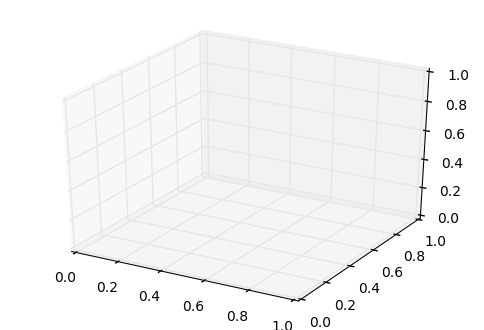

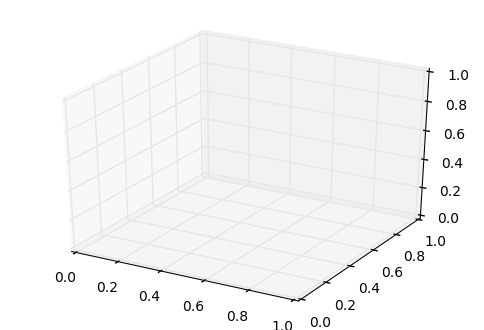

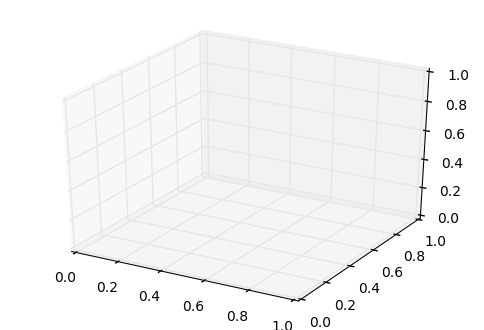

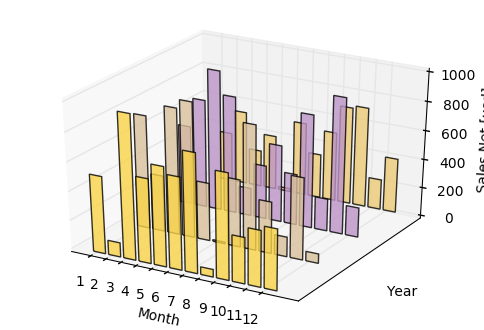

In [6]:
import random

import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

from mpl_toolkits.mplot3d import Axes3D

mpl.rcParams['font.size'] = 10

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

for z in [2011, 2012, 2013, 2014]:
    xs = range(1,13)
    ys = 1000 * np.random.rand(12)
    
    color = plt.cm.Set2(random.choice(range(plt.cm.Set2.N)))
    ax.bar(xs, ys, zs=z, zdir='y', color=color, alpha=0.8)

ax.xaxis.set_major_locator(mpl.ticker.FixedLocator(xs))
ax.yaxis.set_major_locator(mpl.ticker.FixedLocator(ys))


ax.set_xlabel('Month')
ax.set_ylabel('Year')
ax.set_zlabel('Sales Net [usd]')

plt.show()

How it works...

We had to do the same prep work as in the 2D world. The difference here is that we needed to specify what "kind of backend". Then we generate random data for supposedly 4 years of sale (2011-2014).

We needed to specify Z values to be the same for the 3D axis.

We picked the color randomly from the color-map set, and then we associated each Z-order collection of xs, ys pairs that would be used to render the bar series.

There's more...

The other plot from 2D matplotlib is available here—for example, scatter()—which has a similar interface to plot(), but with increased size of the point marker. We are also familiar with contour, contourf, and bar.

New types that are available only in 3D are wireframe, surface, and tri-surface plots.

For example, this code example plots a tri-surface plot of popular Pringle functions or, more mathematically, a hyperbolic paraboloid:

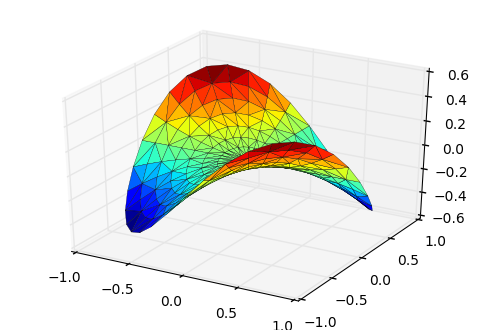

In [7]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
import matplotlib.pyplot as plt
import numpy as np

n_angles = 36
n_radii = 8

# An array of radii
# Does not include radius r=0, this is to eliminate duplicate points
radii = np.linspace(0.125, 1.0, n_radii)

# An array of angles
angles = np.linspace(0, 2*np.pi, n_angles, endpoint=False)

# Repeat all angles for each radius
angles = np.repeat(angles[...,np.newaxis], n_radii, axis=1)

# Convert polar (radii, angles) coords to cartesian (x, y) coords
# (0, 0) is added here. There are no duplicate points in the (x, y) plane
x = np.append(0, (radii*np.cos(angles)).flatten())
y = np.append(0, (radii*np.sin(angles)).flatten())

# Pringle surface
z = np.sin(-x*y)

fig = plt.figure()
ax = fig.gca(projection='3d')

ax.plot_trisurf(x, y, z, cmap=cm.jet, linewidth=0.2)

plt.show()